# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

*Notes:* 

- Solve the questions with python.

- Round the final answer to three decimal places.

## Distribuição uniforme discreta
Quando os valores que a variável pode assumir têm todos igual probabilidade.

### DISTRIBUIÇÕES DISCRETAS (principais distribuições)
* Distribuição uniforme discreta
* Distribuição de Bernoulli e distribuição binomial
* Distribuição geométrica e distribuição binomial
negativa
* Distribuição hipergeométrica
* Distribuição de Poisson

In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import geom
from scipy.stats import poisson

#### A DISTRIBUIÇÃO DE BERNOULLI
É uma distribuição discreta caracterizada por:
* Uma única prova de Bernoulli
* Probabilidade de sucesso p

#### A distribuição de Bernoulli dá a probabilidade de obter x sucessos, numa única prova de Bernoulli, tendo essa prova a  probabilidade p de obter um sucesso.

## Bernoulli's Distribution

In a basket containing 100 fruits, there are 60 apples and 40 oranges. 

A fruit is picked randomly from the basket. 

1. **What is the probability that the fruit is apple?**
1. **What is the probability that it is an orange?**

In [15]:
"""
Calculate:
p = probability that the fruit is an apple 
q = probability that the fruit is an orange
"""

'\nCalculate:\np = probability that the fruit is an apple \nq = probability that the fruit is an orange\n'

$P(apple) = \dfrac{60}{100} = \dfrac{6}{10} = 0.6$

In [3]:
# your code here
p = 0.6
q = 0.4 # (1 - p)

Now we take a random sample of 20 fruits from the basket. After each fruit is taken, a new fruit of the same type is replaced in the basket. Therefore, every time we are taking 1 fruit from 100 fruits. 

1. **What is the probability that the first 5 fruits are all apples?**

1. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

You can include the `p` and `q` probabilities you previous calculated in your solution.

In [4]:
# What is the probability that the first 5 fruits are all apples?
prob1 = round((p**5),3)
#print("%.3f" % prob1)
prob2 = round((p**5*q**15),3)
#print("%.3f" % prob2)
prob1, prob2

(0.078, 0.0)

## Binomial Distribution

Similar to the above problem, this time again we randomly sample 20 fruits.

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

A distribuição binomial dá a probabilidade de obter x sucessos, em n provas de Bernoulli, tendo cada uma dessas provas a mesma
probabilidade p de obter um sucesso.

Antes a ordem importava e por isso não poderíamos usar a dist binomial. Para a pergunta anterior pode-se usar Bernoulli para resolver.

In [5]:
n=20

binomial_dist = binom(n,p)

print("%.3f" % binomial_dist.pmf(5))

0.001


In the lesson we also discussed CDF (cumulative distribution function). In the context of the above problem, **what is the probability that less than 5 fruits picked are apples?**

Write the formula and calculate the probability below.

In [6]:
print("%.3f" % binomial_dist.cdf(5))

0.002


**Plot the PDF (probability distributiom function) for the above binomial distribution.**

*Hint: The range of x in a binomial distribution is from `0` to `n`.*

In [20]:
#x=np.arange(0,n+1)
#plt.plot(x, binomial_dist.pmf(x),"^",label='pmf')
#plt.plot(x, binomial_dist.cdf(x),"o",label='cdf')
#plt.ylabel("Probability")
#plt.xlabel("Observation")
#plt.xticks(x)
#plt.show()

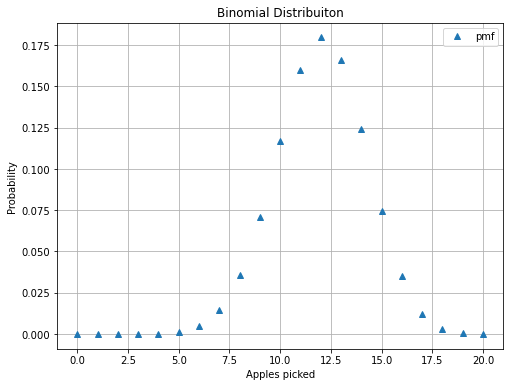

In [7]:
# your code here
# Please label the axes and give a title to the plot
x = np.arange(0,n+1)
f , (ax) = plt.subplots(figsize=(8,6))
ax.plot(x, binomial_dist.pmf(x),"^",label='pmf')
#ax.plot(x, binomial_dist.cdf(x),"o",label='cdf')
ax.set_xlabel('Apples picked')  # Add an x-label to the axes.
ax.set_ylabel('Probability')  # Add a y-label to the axes.
plt.title('Binomial Distribuiton') # Add a title to the plot
plt.grid()
plt.legend()


## Poisson Distribution

In this challenge you are required to use the Math library in python to solve the problems.

In the UEFA champions league tournament, the average number of goals scored in a match is 2.3. 

**What is the probability that the number of goals scored in a match is 5?**

*Hint: Use the exp() in the math library*

And to calculate the factorial, you can use the following code:

```python
import math
math.factorial(n) # n is the number you want to find the factorial of
```

In [22]:
mu = 2.3
poisson_dist=poisson(mu)
round((poisson_dist.pmf(5)),3)

0.054

**Draw a poisson probability distribution plot for the number of goals to be between 0 to 10.**

In [23]:
#x = np.arange(0,11)
#plt.plot(x,poisson_dist.pmf(x),'r^',label='pmf')
#plt.plot(x,poisson_dist.cdf(x),'bo',label='cdf')
#plt.xlabel('Goals')
#plt.ylabel('Probability')
#plt.title('Binomial Distribuiton') # Add a title to the plot
#plt.grid()
#plt.legend()

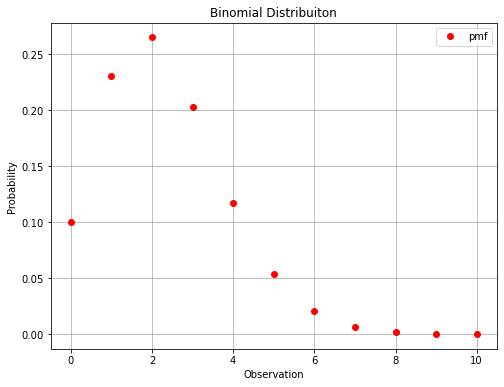

In [25]:
x = np.arange(0,11)
f , (ax) = plt.subplots(figsize=(8,6))
ax.plot(x,poisson_dist.pmf(x),'ro',label='pmf')
#ax.plot(x,poisson_dist.cdf(x),'bo',label='cdf')
ax.set_xlabel('Observation')  # Add an x-label to the axes.
ax.set_ylabel('Probability')  # Add a y-label to the axes.
plt.title('Binomial Distribuiton') # Add a title to the plot
plt.grid()
plt.legend()